# Algoritmo de tesis

In [1]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import call
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#Análisis Exploratorio Inicial
filename = "dataset_tesis/data_oficial_5periodos.xlsx"
df_student_2018_1 = pd.read_excel(filename, "2018-1_ETL")
#df_student_2018_1 = pd.read_excel(filename, "general_ETL")
df_student_2018_1.head()

PERIODO       CODIGO_PERSONAL  \
0  2018-1  2006GU20060226155635   
1  2018-1  2016MA20160229153002   
2  2018-1  2016LA20160229153110   
3  2018-1  2013CU20130306120302   
4  2018-1  2011LA20110308104301   

                                                 EAP  CODIGO_UNIV DATO_SEXO  \
0  E.P. Educacion: Especialidad Linguistica e Ingles    200611286         M   
1  E.P. Educacion: Especialidad Linguistica e Ingles    201612467         F   
2  E.P. Educacion: Especialidad Linguistica e Ingles    201612475         F   
3  E.P. Educacion: Especialidad Linguistica e Ingles    201321233         F   
4  E.P. Educacion: Especialidad Linguistica e Ingles    201121182         F   

   EDAD  CICLO               APELLIDOS_NOMBRES  CANT_CURSO_MAT     RESP_FIN_A  \
0    30      9  Hallasi Solorzano Fredy Guzman               2    dependiente   
1    21      5      Mamani Mayta Wendy Eveling               8    dependiente   
2    29      5         Layme Garcia Flor Maria               8  independiente   
3    23      9    Cuchuyrumi Ttito Ruth Maziel               5    dependiente   
4    25      9       Larico Arenas Mirian Fany               1    dependiente   

   ...  CANT_CURSOS_DESAP  CANT_2  CANT_3  CANT_CRED_DESAP  CANT_CRED_APROB  \
0  ...                  0       0       0                0                6   
1  ...                  0       0       0                0               24   
2  ...                  0       0       0                0               24   
3  ...                  0       0       0                0               21   
4  ...                  0       0       0                0               12   

   PONDERADO  CONDICION_A  CONDICION  SITUACION_A  SITUACION  
0       0.00    Irregular          0     Egresado          0  
1      17.50      Regular          1     Continua          1  
2      17.92      Regular          1     Continua          1  
3      16.29      Regular          1     Continua          1  
4      17.00      Regular          1     Continua          1  

[5 rows x 24 columns]

In [3]:
# eliminamos los campos strings
drop_elements = ['EDAD','PERIODO','CODIGO_PERSONAL','EAP','RESP_FIN_A','CODIGO_UNIV','DATO_SEXO','CICLO',
                 'APELLIDOS_NOMBRES','CONDICION_A','SITUACION_A']
data = df_student_2018_1.drop(drop_elements, axis = 1)

In [4]:
data.shape

(2965, 13)

In [5]:
data.head()

CANT_CURSO_MAT  RESP_FIN  SALDO  BLOQ_BIENESTAR  CANT_CURSOS_AP  \
0               2         0    0.0               0               2   
1               8         0    0.0               0               8   
2               8         1    0.0               0               8   
3               5         0    0.0               0               5   
4               1         0    0.0               0               1   

   CANT_CURSOS_DESAP  CANT_2  CANT_3  CANT_CRED_DESAP  CANT_CRED_APROB  \
0                  0       0       0                0                6   
1                  0       0       0                0               24   
2                  0       0       0                0               24   
3                  0       0       0                0               21   
4                  0       0       0                0               12   

   PONDERADO  CONDICION  SITUACION  
0       0.00          0          0  
1      17.50          1          1  
2      17.92          1          1  
3      16.29          1          1  
4      17.00          1          1

In [6]:
data.SITUACION.unique()

array([0, 1], dtype=int64)

In [7]:
#split dataset in features and target variable
feature_cols = ['CANT_CURSO_MAT', 'RESP_FIN', 'SALDO', 'BLOQ_BIENESTAR','CANT_CURSOS_AP','CANT_CURSOS_DESAP','CANT_2',
               'CANT_3','CANT_CRED_DESAP','CANT_CRED_APROB','PONDERADO','CONDICION']
X = data[feature_cols] # Features
y = data.SITUACION # Target variable

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# ARBOLDE DECISION (entrenamiento)

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.850561797753


In [30]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Poda del arbol

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.893258426966


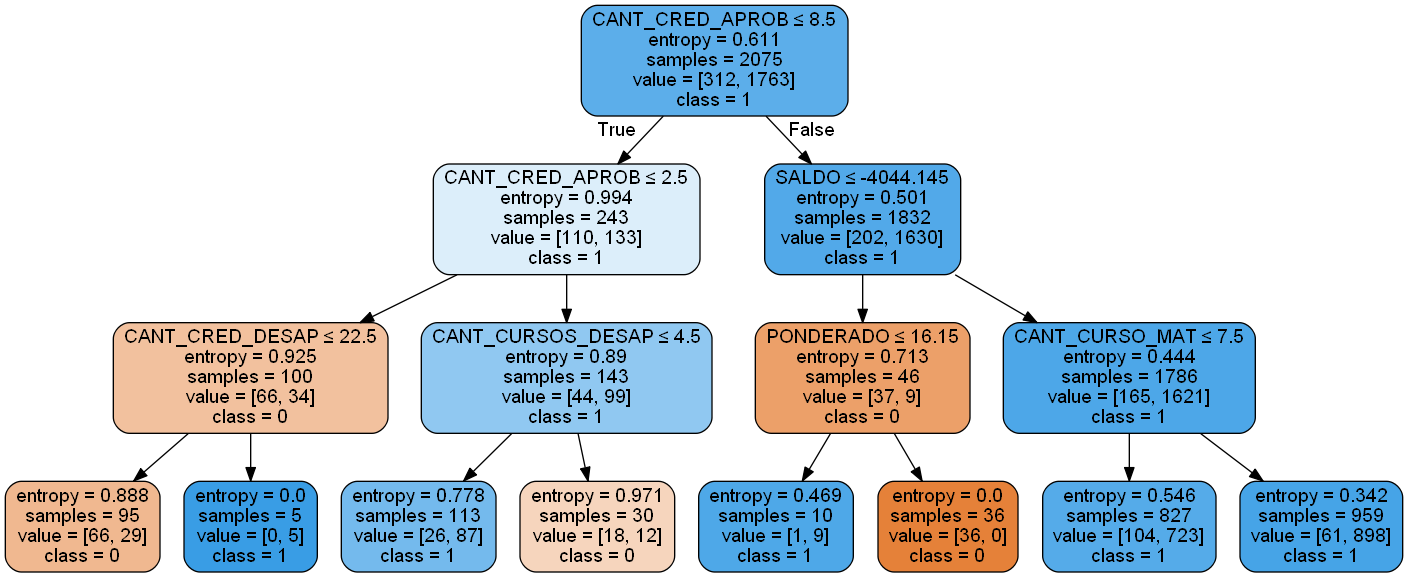

In [32]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#  RANDOM FOREST (entrenamiento)

In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clrf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clrf.fit(X_train,y_train)

y_pred=clrf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.897752808989


In [30]:
clrf.predict([[4,0,327.59,0,4,0,0,0,0,22,15.87,1]])

array([1], dtype=int64)

# Features con importancia segun Random Forest

In [31]:

#Create a Gaussian Classifier
clfrf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfrf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
import pandas as pd

data_features = data.drop(['SITUACION'], axis=1)
feature_imp = pd.Series(clrf.feature_importances_,index=data_features.columns).sort_values(ascending=False)
feature_imp

PONDERADO            0.249303
SALDO                0.246055
CANT_CRED_APROB      0.166319
CANT_CURSOS_AP       0.071916
CANT_CRED_DESAP      0.070400
CANT_CURSOS_DESAP    0.061025
CANT_CURSO_MAT       0.058229
CONDICION            0.027330
CANT_2               0.016759
CANT_3               0.015223
RESP_FIN             0.010349
BLOQ_BIENESTAR       0.007091
dtype: float64

No handles with labels found to put in legend.


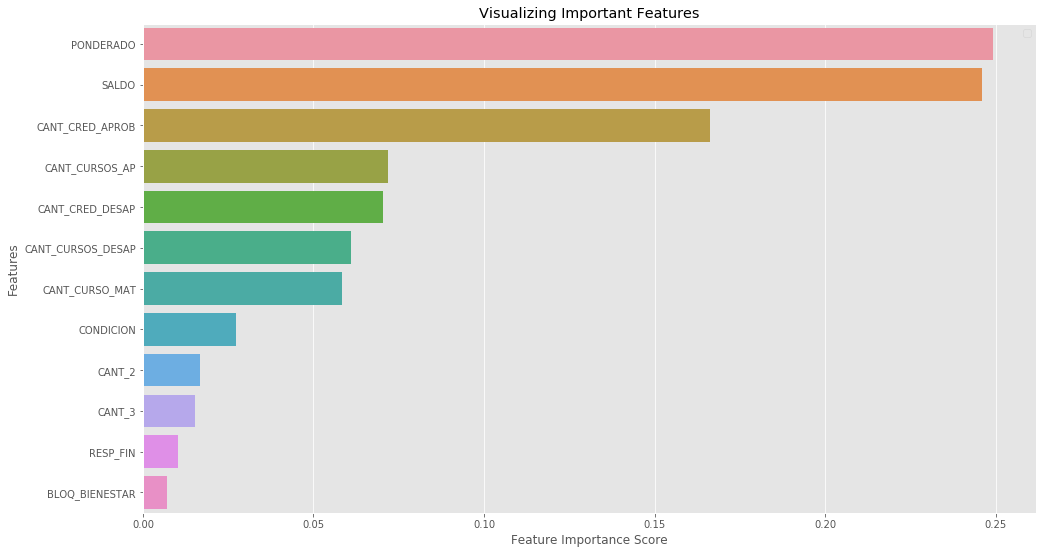

In [36]:
# Creating a bar plot
sb.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGBoost (entrenamiento)

In [9]:
from xgboost import XGBClassifier

In [10]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [12]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.78%


In [16]:

from sklearn.metrics import confusion_matrix
from termcolor import colored

In [20]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[ 50  81]
 [ 10 749]]
The Accuracy on Test Set is:  0.897752808989


# Predicción de desercion

In [20]:
#predecir si el estudiante es desertor

x_test = pd.DataFrame(columns=('CANT_CURSO_MAT','RESP_FIN', 'SALDO', 'BLOQ_BIENESTAR','CANT_CURSOS_AP',
                               'CANT_CURSOS_DESAP','CANT_2','CANT_3','CANT_CRED_DESAP','CANT_CRED_APROB',
                               'PONDERADO','CONDICION','SITUACION'))
x_test.loc[0] = (4,0,327.59,0,4,0,0,0,0,22,15.87,1,1)
y_pred = model.predict(x_test.drop(['SITUACION'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = model.predict_proba(x_test.drop(['SITUACION'], axis = 1))
print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0]* 100, 2))+"%")

Prediccion: [1]
Probabilidad de Acierto: 98.18%
